In [2]:
!pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 3.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfs = {}
# Excel 파일을 열기
for sheet in pd.ExcelFile('Raw Data.xlsx').sheet_names:
    dfs[sheet] = pd.read_excel('Raw Data.xlsx', sheet_name=sheet)

print(len(dfs))

3


In [5]:
dfs.keys()

dict_keys(['orders', 'customers', 'products'])

### orders

In [6]:
dfs['orders']

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dfs['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 101.7+ KB


In [20]:
# Order Date 연도 분포 보기
dfs['orders']['Order Date'].apply(lambda x:x.year).value_counts().to_frame()

,Order Date
2021,312
2020,263
2019,259
2022,166


2019년부터 2022년까지의 데이터로 확인된다.

In [24]:
# Product ID 분포 보기
dfs['orders']['Product ID'].nunique()

48

유저들이 주문한 상품의 개수는 총 48개

In [25]:
# Quantity 분포 보기
dfs['orders']['Quantity'].value_counts().to_frame()

,Quantity
2,185
6,175
3,174
4,165
5,162
1,139


주문 개수는 1개부터 6개까지

In [29]:
dfs['orders'].isna().sum().to_frame()

,0
Order ID,0
Order Date,0
Customer ID,0
Product ID,0
Quantity,0
Customer Name,1000
Email,1000
Country,1000
Coffee Type,1000
Roast Type,1000


지금 살펴본 것 외에 다른 컬럼들은 전부 null값이 들어있다. 그냥 지워버리면 될 듯

In [32]:
order_df = dfs['orders'].dropna(axis=1)
order_df

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2
...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1


### customers

In [33]:
dfs['customers']

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No
996,62494-09113-RP,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No
997,10940-42739-ET,Etan Featenby,NaN,+1 (719) 416-9560,885 Toban Plaza,Colorado Springs,United States,80920,Yes
998,64965-78386-MY,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No


In [34]:
dfs['customers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [35]:
dfs['customers'].isna().sum().to_frame()

,0
Customer ID,0
Customer Name,0
Email,204
Phone Number,130
Address Line 1,0
City,0
Country,0
Postcode,0
Loyalty Card,0


Email과 Phone Number에는 null 값이 있고 나머지는 잘 들어가 있다.

In [39]:
dfs['customers']['City'].value_counts()

Washington       27
Houston          14
New York City    13
El Paso          12
Los Angeles      12
                 ..
Sutton            1
New Brunswick     1
Valleymount       1
Alhambra          1
Oceanside         1
Name: City, Length: 386, dtype: int64

도시가 386개나 된다.

In [40]:
dfs['customers']['Country'].value_counts()

United States     782
Ireland           150
United Kingdom     68
Name: Country, dtype: int64

미국, 아일랜드, 영국의 데이터인 모양이다.

In [41]:
dfs['customers']['Loyalty Card'].value_counts()

No     513
Yes    487
Name: Loyalty Card, dtype: int64

Loyalty Card가 뭔데...?

In [47]:
dfs['customers']['Loyalty Card_b'] = dfs['customers']['Loyalty Card'].apply(lambda x:1 if x == 'Yes' else 0)
dfs['customers']['Loyalty Card_b'].value_counts()

0    513
1    487
Name: Loyalty Card_b, dtype: int64

편하게 컨트롤하기 위해 binary로 바꿔버리고

In [54]:
loyalty_df = dfs['customers'].groupby('Country').agg({
    'Loyalty Card_b': 'sum', 'Loyalty Card': 'count'
}).sort_values('Loyalty Card_b', ascending=False)

loyalty_df

,Loyalty Card_b,Loyalty Card
Country,,
United States,380,782
Ireland,80,150
United Kingdom,27,68


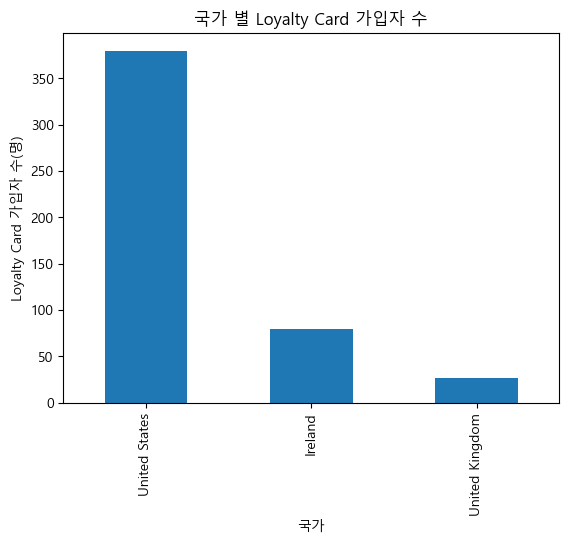

In [61]:
loyalty_df['Loyalty Card_b'].plot(kind='bar')
plt.title('국가 별 Loyalty Card 가입자 수')
plt.xlabel('국가')
plt.ylabel('Loyalty Card 가입자 수(명)')
plt.show()

미국, 아일랜드, 영국 순서로 Loyalty Card 가입자 수가 많다.

In [58]:
loyalty_df['Ratio'] = round(loyalty_df['Loyalty Card_b'] / loyalty_df['Loyalty Card'], 2)
loyalty_df.sort_values('Ratio', ascending=False)

,Loyalty Card_b,Loyalty Card,Ratio
Country,,,
Ireland,80,150,0.53
United States,380,782,0.49
United Kingdom,27,68,0.40


Loyalty Card 가입 비율은 아일랜드, 미국, 영국 순서이다.

### products

In [62]:
dfs['products']

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375
5,A-M-0.5,Ara,M,0.5,6.750,1.3500,0.60750
6,A-M-1,Ara,M,1.0,11.250,1.1250,1.01250
7,A-M-2.5,Ara,M,2.5,25.875,1.0350,2.32875
8,A-D-0.2,Ara,D,0.2,2.985,1.4925,0.26865
9,A-D-0.5,Ara,D,0.5,5.970,1.1940,0.53730


In [63]:
dfs['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [64]:
dfs['products']['Coffee Type'].value_counts().to_frame()

,Coffee Type
Ara,12
Rob,12
Lib,12
Exc,12


In [65]:
dfs['products']['Roast Type'].value_counts().to_frame()

,Roast Type
L,16
M,16
D,16


In [66]:
dfs['products']['Size'].value_counts().to_frame()

,Size
0.2,12
0.5,12
1.0,12
2.5,12


Coffee Type 4가지, Roast Type 3가지, Size 4가지가 조합되어 48개의 상품을 구성한다.

내가 보기에 Size의 단위는 L이다. 한국 스타벅스 기준으로 생각해 보면 톨(0.354L), 그란데(0.473L), 벤티(0.591L)이니까 대충 맞지 싶다. 근데 2.5는 뭐야...?

In [67]:
dfs['products'][['Unit Price', 'Price per 100g', 'Profit']].describe()

,Unit Price,Price per 100g,Profit
count,48.000000,48.000000,48.000000
mean,13.046250,1.435087,1.316219
std,9.953578,0.371981,1.161426
min,2.685000,0.823400,0.161100
25%,5.216250,1.191400,0.501300
50%,9.230000,1.370600,0.943800
75%,17.033750,1.659375,1.657700
max,36.455000,2.377500,4.739150


가격 단위는 달러일 것 같다.

In [73]:
coffee_type_df = dfs['products'].groupby('Coffee Type').agg({'Unit Price': 'mean'}).sort_values('Unit Price', ascending=False)
coffee_type_df

,Unit Price
Coffee Type,
Lib,15.1725
Exc,14.2625
Ara,11.9525
Rob,10.7975


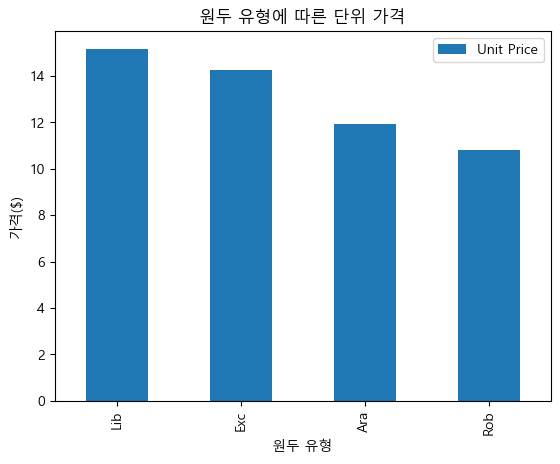

In [75]:
coffee_type_df.plot(kind='bar')
plt.title('원두 유형에 따른 단위 가격')
plt.xlabel('원두 유형')
plt.ylabel('가격($)')
plt.show()

원두는 Lib(리베리카) > Exc(엑셀사) > Ara(아라비카) > Rob(로부스타) 순서로 높은 가격이 책정된다.

In [77]:
roast_type_df = dfs['products'].groupby('Roast Type').agg({'Unit Price': 'mean'}).sort_values('Unit Price', ascending=False)
roast_type_df

,Unit Price
Roast Type,
L,14.59500
M,12.99375
D,11.55000


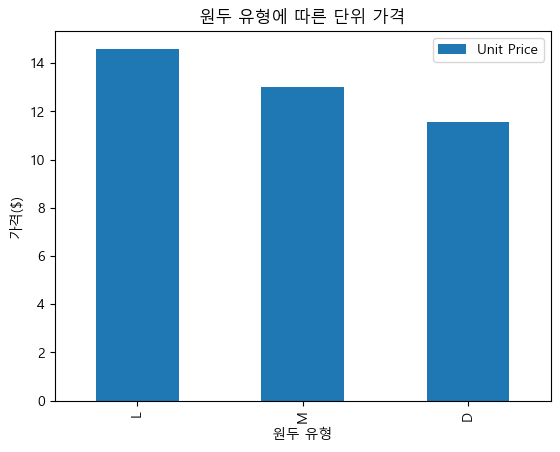

In [78]:
roast_type_df.plot(kind='bar')
plt.title('로스트 유형에 따른 단위 가격')
plt.xlabel('로스트 유형')
plt.ylabel('가격($)')
plt.show()

로스트 유형에는 Light, Medium, Dark가 있다고 한다. Light > Medium > Dark 순서로 높은 단위 가격을 형성한다.

In [84]:
size_df = dfs['products'].groupby('Size').agg({'Unit Price': 'mean', 'Price per 100g': 'mean'}).sort_values('Unit Price', ascending=False).reset_index()
size_df

,Size,Unit Price,Price per 100g
0,2.5,28.5775,1.14310
1,1.0,12.4250,1.24250
2,0.5,7.4550,1.49100
3,0.2,3.7275,1.86375


In [85]:
size_df['Ratio'] = size_df['Unit Price'] / size_df['Size']
size_df

,Size,Unit Price,Price per 100g,Ratio
0,2.5,28.5775,1.14310,11.4310
1,1.0,12.4250,1.24250,12.4250
2,0.5,7.4550,1.49100,14.9100
3,0.2,3.7275,1.86375,18.6375


Ratio를 굳이 구할 필요가 없었네요!

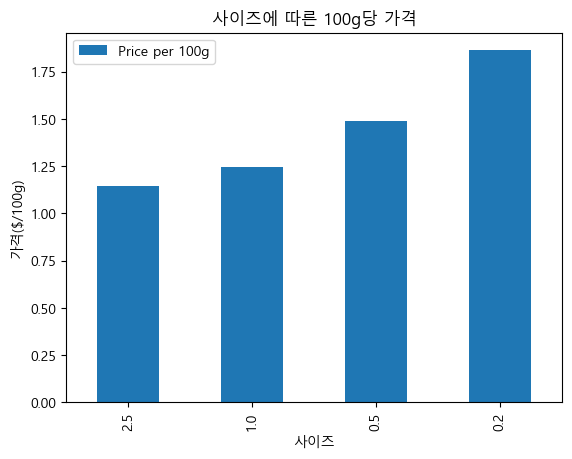

In [90]:
size_df.plot(kind='bar', x='Size', y='Price per 100g')
plt.title('사이즈에 따른 100g당 가격')
plt.xlabel('사이즈')
plt.ylabel('가격($/100g)')
plt.show()

클수록 단위 가격은 싸고 작을수록 단위 가격은 비싸다. 사실 당연한 거긴 하다...!

### 어떤 국가에서 판매량이 많은가?

3개 df 묶어서 -> Country로 groupby -> Unit Price 및 Profit 확인

### 각 국가별 원두, 로스팅 선호도

3개 df 묶어서 -> Country+Coffee Type 또는 Country+Roast Type으로 groupby -> count 또는 Unit Price 및 Profit 확인

### Loyality Card 가입자는 더 많은 비용을 지출하는가?

H0: Loyality Card 가입자의 주문 횟수 = Loyality Card 비가입자의 주문 횟수

H1: Loyality Card 가입자의 주문 횟수 > Loyality Card 비가입자의 주문 횟수

그리고

H0: Loyality Card 가입자의 전체 사용 금액(주문한 품목 별로 Unit Price 이용하여 도출) = Loyality Card 비가입자의 전체 사용 금액

H1: Loyality Card 가입자의 전체 사용 금액 > Loyality Card 비가입자의 전체 사용 금액

두 가지 가설 검정 수행하여 확인해보기